<a href="https://colab.research.google.com/github/ishtarpcamo/ishtar/blob/main/%D8%A8%D8%AE%D8%B4_%D8%B3%D9%88%D9%85_%D8%B3%D9%88%D8%A7%D9%84%D8%A7%D8%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

پاسخ سوال 3-1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  

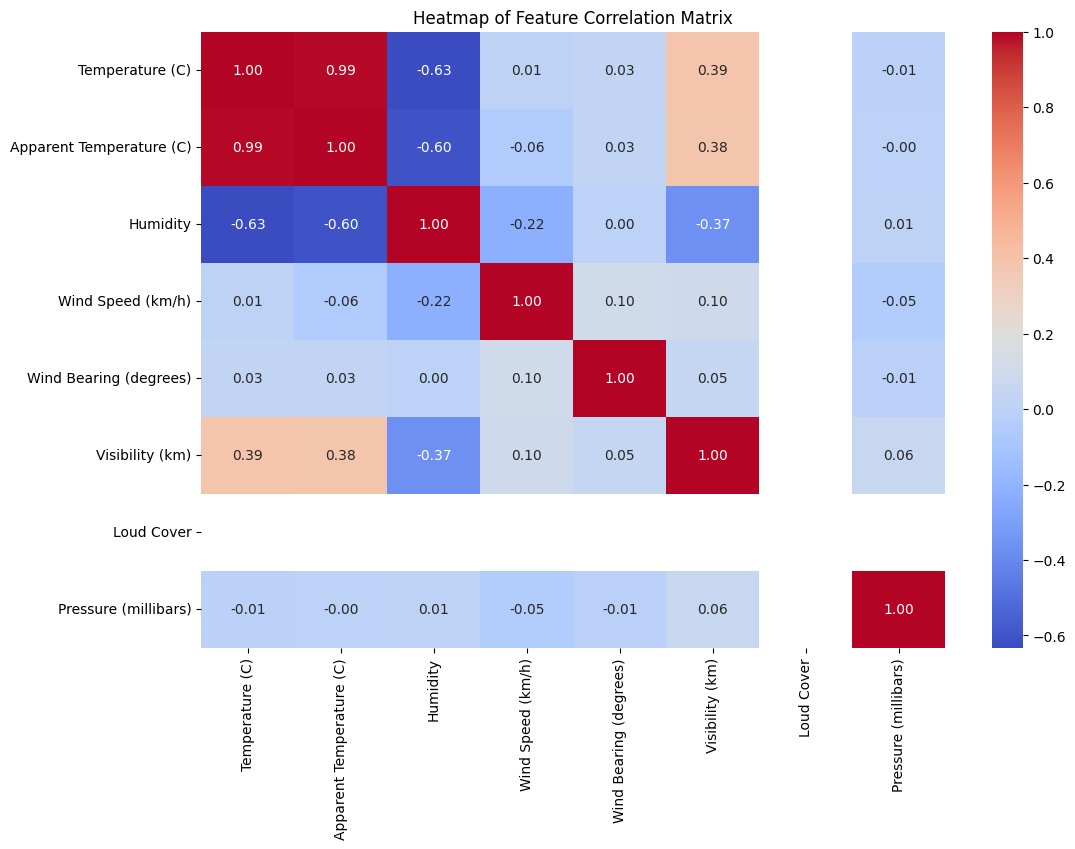

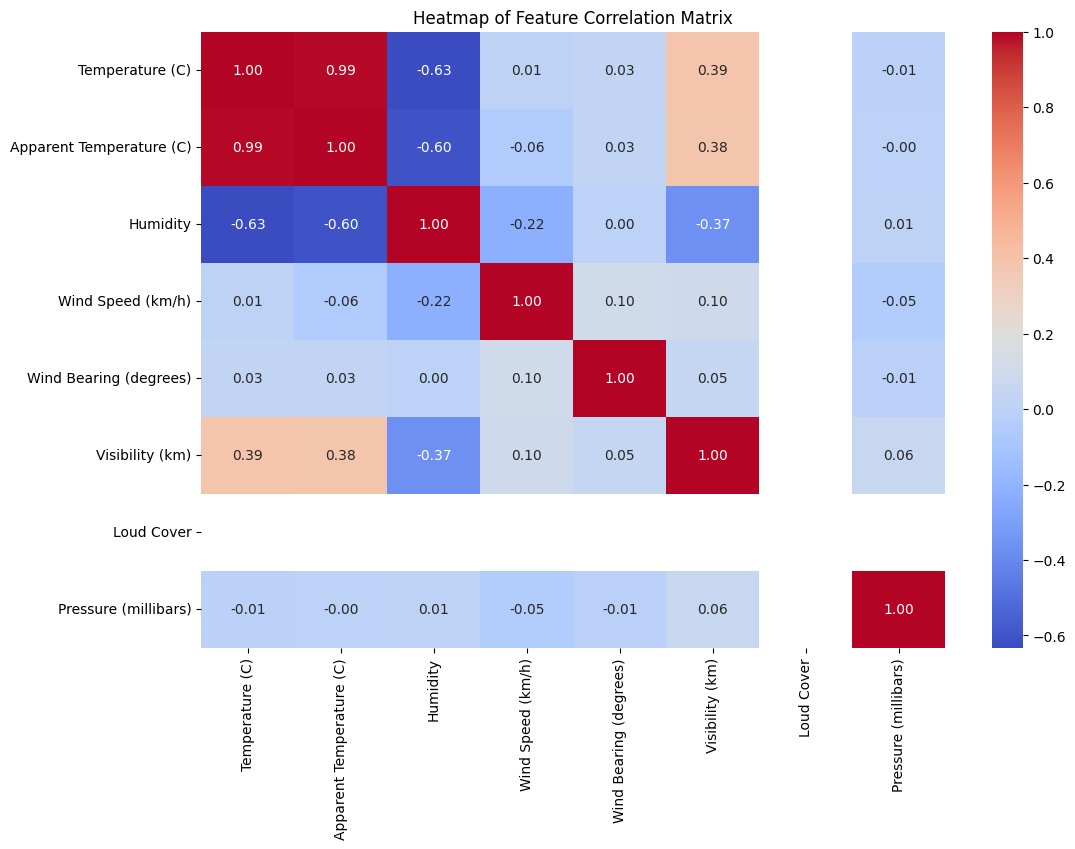

<Figure size 1600x1000 with 0 Axes>

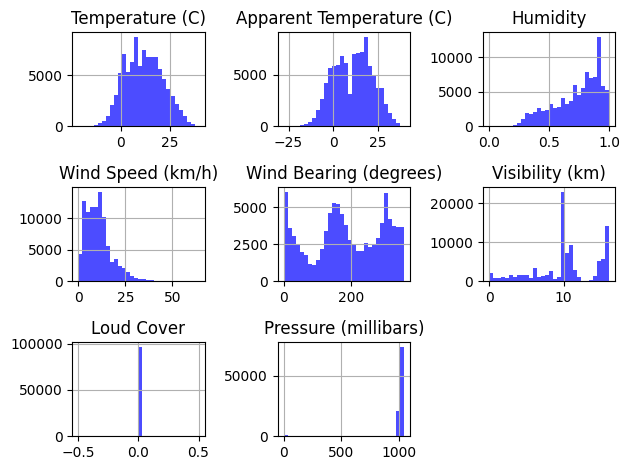

In [14]:
# اتصال Google Colab به Google Drive
from google.colab import drive
drive.mount('/content/drive')

# بارگیری کتابخانه‌های مورد نیاز
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بارگیری داده‌ها از فایل CSV
file_path = '/content/drive/MyDrive/weatherHistory.csv'
data = pd.read_csv(file_path)

# رسم هیت‌مپ ماتریس همبستگی
# نمایش اطلاعات جامع از دیتافریم
data.info()

# انتخاب ستون‌های عددی برای هیت‌مپ ماتریس همبستگی
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

# رسم هیت‌مپ ماتریس همبستگی برای ستون‌های عددی
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlation Matrix")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlation Matrix")
plt.show()

# رسم هیستوگرام پراکندگی ویژگی‌ها
plt.figure(figsize=(16, 10))
data.hist(bins=30, color='blue', alpha=0.7)
plt.tight_layout()
plt.show()


2

LS Train MSE: 1.5633740092946193
LS Test MSE: 1.5531621552077832
RLS Train MSE: 1.5633740096780917
RLS Test MSE: 1.5531624776836885


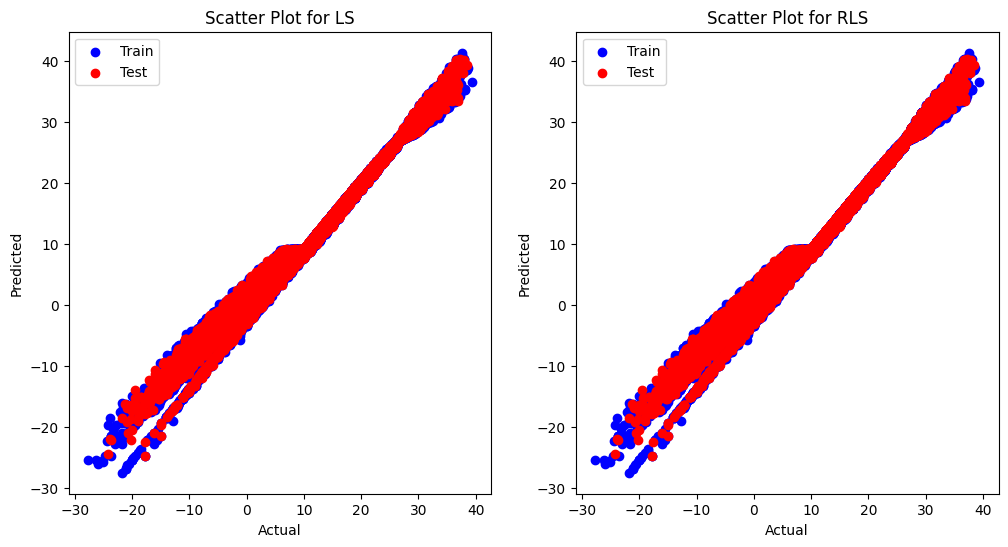

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# بارگذاری داده‌ها
data = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv.txt')

# جدا کردن ویژگی‌های وابسته و مستقل
X = data[['Humidity', 'Temperature (C)']]
y = data['Apparent Temperature (C)']

# تقسیم داده به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# آموزش مدل LS
model_ls = LinearRegression()
model_ls.fit(X_train, y_train)

# آموزش مدل RLS
model_rls = Ridge(alpha=0.1)  # تنظیم پارامتر alpha
model_rls.fit(X_train, y_train)

# پیش‌بینی برای داده‌های آموزش و آزمون
y_train_pred_ls = model_ls.predict(X_train)
y_test_pred_ls = model_ls.predict(X_test)

y_train_pred_rls = model_rls.predict(X_train)
y_test_pred_rls = model_rls.predict(X_test)

# محاسبه خطاها
train_mse_ls = mean_squared_error(y_train, y_train_pred_ls)
test_mse_ls = mean_squared_error(y_test, y_test_pred_ls)

train_mse_rls = mean_squared_error(y_train, y_train_pred_rls)
test_mse_rls = mean_squared_error(y_test, y_test_pred_rls)

# چاپ خطاها
print("LS Train MSE:", train_mse_ls)
print("LS Test MSE:", test_mse_ls)
print("RLS Train MSE:", train_mse_rls)
print("RLS Test MSE:", test_mse_rls)

# رسم نمودارهای پراکندگی
plt.figure(figsize=(12, 6))

# نمودار پراکندگی برای LS
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ls, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_ls, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for LS')
plt.legend()

# نمودار پراکندگی برای RLS
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_rls, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_rls, color='red', label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot for RLS')
plt.legend()

plt.show()


3

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv.txt')

# Separate the dependent and independent features
X = data[['Humidity', 'Temperature (C)']]
y = data['Apparent Temperature (C)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model_slw = LinearRegression()
model_slw.fit(X_train, y_train)

# Predict for training and testing data
y_train_pred_slw = model_slw.predict(X_train)
y_test_pred_slw = model_slw.predict(X_test)

# Calculate mean squared errors
train_mse_slw = mean_squared_error(y_train, y_train_pred_slw)
test_mse_slw = mean_squared_error(y_test, y_test_pred_slw)

# Print the mean squared errors
print("SLW Train MSE:", train_mse_slw)
print("SLW Test MSE:", test_mse_slw)


SLW Train MSE: 1.5633740092946193
SLW Test MSE: 1.5531621552077832
